In [49]:
import pandas as pd
from sklearn.preprocessing import MinMaxScaler

import torch
import torch.nn as nn
import torch.optim as optim

In [3]:
data = pd.read_csv('data.csv')
data

,icnfdr,u10,v10,skt,stl1
0,0.000000,0.056832,0.957896,276.28003,280.07422
1,2.706619,-3.841340,-1.608145,271.26147,276.03540
2,0.000000,-3.089500,1.368855,274.17432,276.51562
3,8.423843,-2.918611,-0.850688,275.58667,277.18604
4,0.000000,-2.014422,5.146151,279.07617,280.63086
...,...,...,...,...,...
706,NaN,-1.806368,-1.001820,275.74536,277.48096
707,NaN,-0.895656,-0.480081,277.18970,278.28687
708,NaN,-1.086442,-0.691006,274.17432,276.23340
709,NaN,-3.490355,-1.787339,273.64770,276.18164


In [11]:
df = data[0: 700]
df.isnull().sum()

icnfdr    0
u10       0
v10       0
skt       0
stl1      0
dtype: int64

In [12]:
df.describe()

,icnfdr,u10,v10,skt,stl1
count,700.000000,700.000000,700.000000,700.000000,700.000000
mean,19.853885,-1.459103,-0.474701,281.388213,284.290152
std,16.485733,1.032350,1.085289,7.271590,6.717308
min,0.000000,-4.820744,-2.879789,264.518300,272.991940
25%,3.571640,-2.014660,-0.932423,275.548650,278.321592
50%,17.043592,-1.387838,-0.685670,280.821775,283.200200
75%,34.765828,-0.963484,-0.472789,287.486322,290.021482
max,52.298973,4.202857,7.671938,296.716800,299.346920


In [23]:
df.corr()

,icnfdr,u10,v10,skt,stl1
icnfdr,1.000000,-0.095017,-0.363743,0.829444,0.813022
u10,-0.095017,1.000000,0.282923,0.010491,0.045264
v10,-0.363743,0.282923,1.000000,-0.160913,-0.166961
skt,0.829444,0.010491,-0.160913,1.000000,0.980786
stl1,0.813022,0.045264,-0.166961,0.980786,1.000000


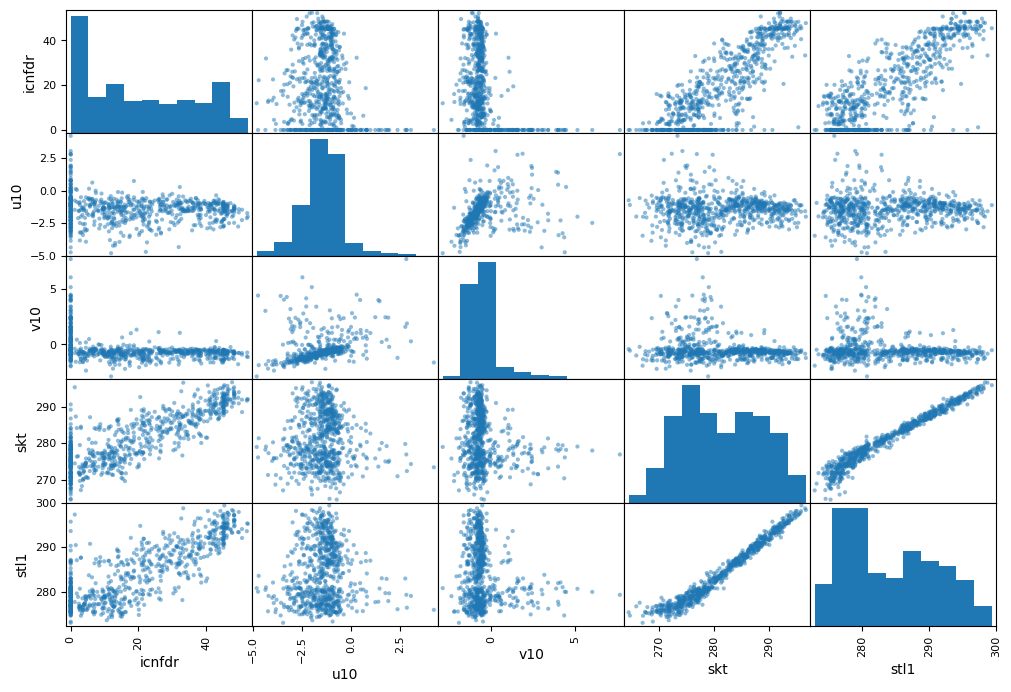

In [24]:
from pandas.plotting import scatter_matrix
import matplotlib.pyplot as plt
scatter_matrix(df, figsize=(12,8))
plt.show()

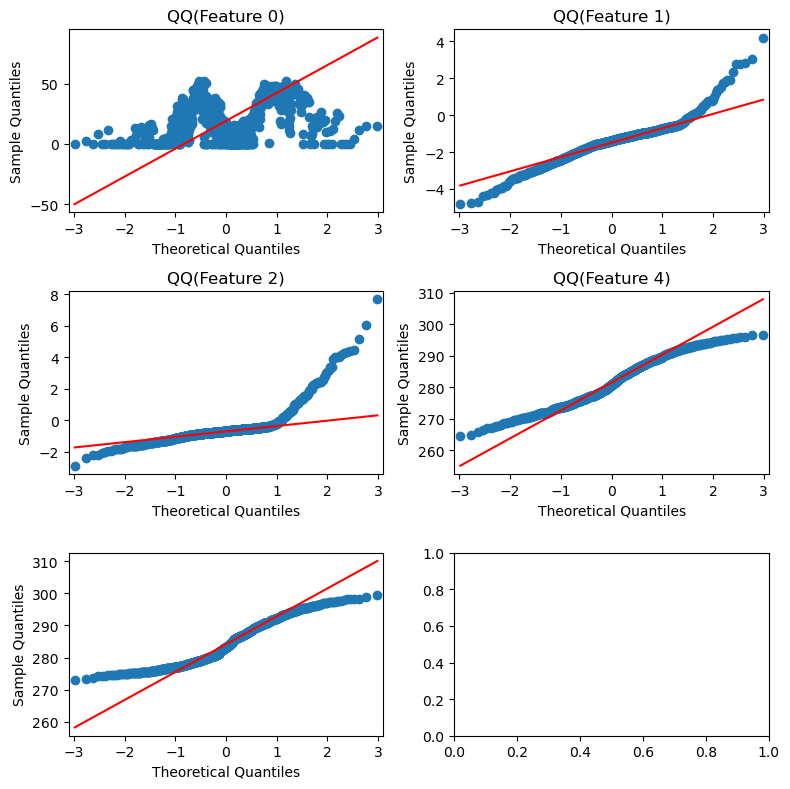

In [27]:
import statsmodels.api as sm
fig, ((ax1,ax2),(ax3,ax4), (ax5, ax6)) = plt.subplots(3, 2, figsize=(8,8))
fig = sm.qqplot(df[['icnfdr']], line='q', ax=ax1)
ax1.set_title('QQ(Feature 0)')
fig = sm.qqplot(df['u10'], line='q',ax=ax2)
ax2.set_title('QQ(Feature 1)')
fig = sm.qqplot(df['v10'], line='q', ax=ax3)
ax3.set_title('QQ(Feature 2)')
fig = sm.qqplot(df['skt'], line='q', ax=ax4)
ax4.set_title('QQ(Feature 3)')
fig = sm.qqplot(df['stl1'], line='q', ax=ax5)
ax4.set_title('QQ(Feature 4)')

plt.tight_layout()
plt.show()

Here, we are able to see the fire seasons coming together in an interesting and meaningful way. In some sense, we have two different curvatures involved. While I am not entirely sure why this is - I wasn't exactly expecting it, it could definitely have to do with having two seperate fire seasons. However, I am less inclined to believe this given the fact this is distributed over quantized data spaces. More articulately, it could certainly be the two distinct fire seasons, forming this sort of indistinct sine wave to show the entrance and exit of high fire seasons. My disposition is that there are actually at least two main situations where fires are likely, that may be contributing to this wave behavior. Lets see how these values plot over time, to try to raise some understanding.

# Visual for Figure 1

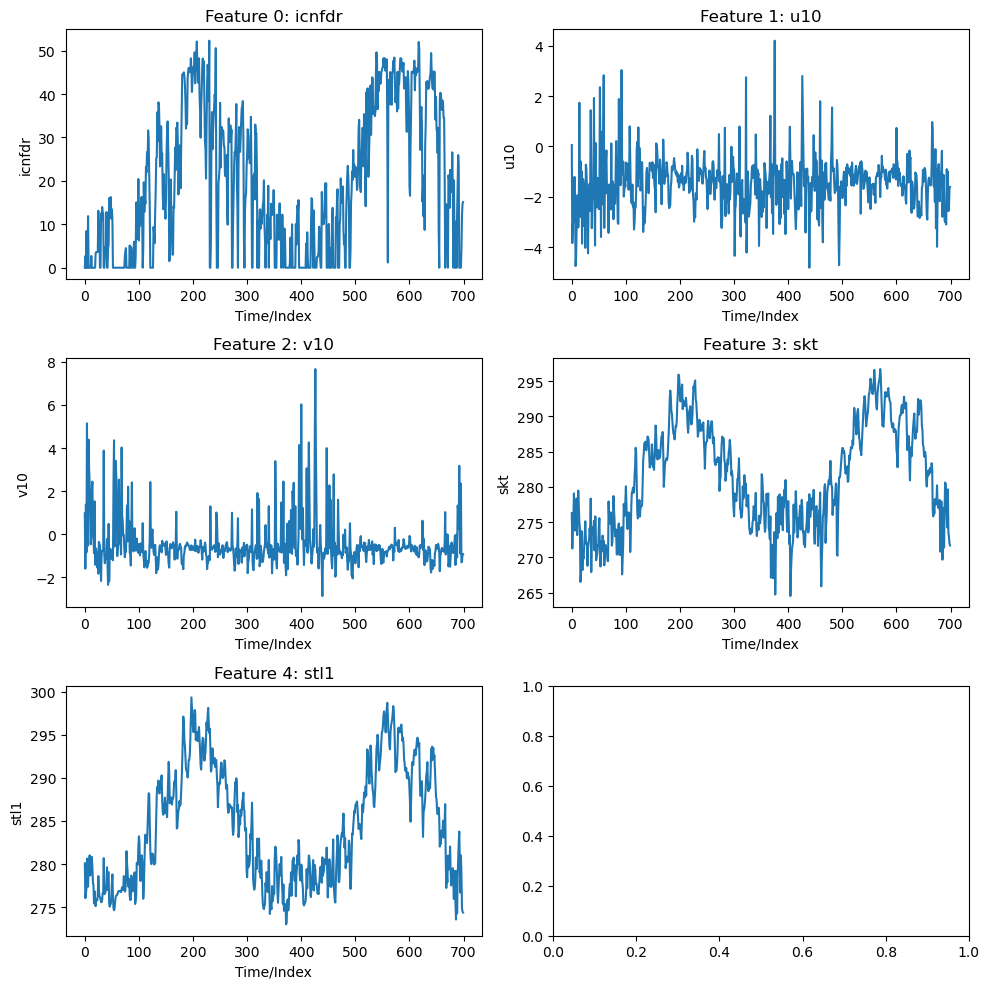

In [28]:
time_index = df.index  
fig, ((ax1, ax2), (ax3, ax4), (ax5, ax6)) = plt.subplots(3, 2, figsize=(10, 10))

ax1.plot(time_index, df['icnfdr'])
ax1.set_title('target: icnfdr')
ax1.set_xlabel('Days')
ax1.set_ylabel('icnfdr')

ax2.plot(time_index, df['u10'])
ax2.set_title('Feature 1: u10')
ax2.set_xlabel('Days')
ax2.set_ylabel('u10')

ax3.plot(time_index, df['v10'])
ax3.set_title('Feature 2: v10')
ax3.set_xlabel('Days')
ax3.set_ylabel('v10')

ax4.plot(time_index, df['skt'])
ax4.set_title('Feature 3: skt')
ax4.set_xlabel('Days')
ax4.set_ylabel('skt')

ax5.plot(time_index, df['stl1'])
ax5.set_title('Feature 4: stl1')
ax5.set_xlabel('Days')
ax5.set_ylabel('stl1')


plt.tight_layout()
plt.show()

This visualization over time may give a better understanding of the data form, and confirm or disprove some of our previous thinking. Notably, it looks like we are capturing data in sinusoidals where relevant (temperature, fire likelihoods), which becomes more interesting as we capture more years and seasons. We also can see intense north-south winds in winter 2023-2024.

From a look inside the CSV, we can see that we pass through two notable fire seasons in 2023 and 2024, and also acknowledge that the risk for wildfires essentially never dissipates fully throughout the year, but only dims. We can see that the north-south direction have stronger winds, and that the soil temperature has a slower standard deviation than that of the surface temperature, which makes sense as it holds and moderates heat. We can also begin to see the scale that the ignition component has reached througout the past 2 years. 